#  Change_quantiles

First fixes a corridor given by the quantiles ql and qh of the distribution of x. Then calculates the average, absolute value of consecutive changes of the series x inside this corridor.

ql :lower quantile<br>
qh : higher quantile

[ql - qh] 분위구간 안에서 데이터가 연속적으로 나타나는 값의 차이 평균 또는 분산을 반환

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tsfresh.feature_extraction import settings, extract_features

In [3]:
np.random.seed(1000)

## Example 01

In [11]:
ex1 = np.random.rand(30)

[0.84241124 0.19874506 0.02072272 0.60165179 0.97091916 0.73213217
 0.73639381 0.00564072 0.29116439 0.74535564 0.07664517 0.77987308
 0.19980574 0.45237551 0.84905468 0.17908859 0.97449772 0.90629069
 0.3178783  0.64066667 0.68260966 0.62882556 0.10128694 0.66304169
 0.94372096 0.22806947 0.23237955 0.91235757 0.10078862 0.89303868]


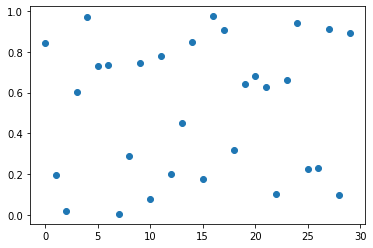

In [12]:
print(ex1)

plt.plot(ex1, 'o')

0.3985766280003722
0.8578514830653456


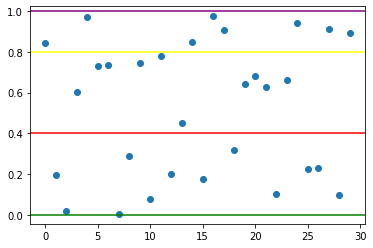

In [14]:
ex1_series = pd.Series(ex1)

# ql = lower quantile
# qh = higher quantile

q0 = 0.0
ql = 0.4
qh = 0.8
q1 = 1.0

print(ex1_series.quantile(ql))
print(ex1_series.quantile(qh))

ax = plt.subplot()
ax.plot(ex1, 'o')
ax.axhline(ql, color = 'red')
ax.axhline(qh, color = 'yellow')
ax.axhline(q0, color = 'green')
ax.axhline(q1, color = 'purple')

In [15]:
# [ql, qh]분위에 해당하는 값 = True
bin_cat = pd.qcut(ex1, [ql, qh], labels = False)
bin_cat_0 = bin_cat == 0 

bin_cat_0

array([ True, False, False,  True, False,  True,  True, False, False,
        True, False,  True, False,  True,  True, False, False, False,
       False,  True,  True,  True, False,  True, False, False, False,
       False, False, False])

In [16]:
np.sum(bin_cat_0)

12

calculates mean of consecutive changes of the series x

In [17]:
def _roll(a, shift):
    if not isinstance(a, np.ndarray):
        a = np.asarray(a)
    idx = shift % len(a)
    return np.concatenate([a[-idx:], a[:-idx]])

_roll(bin_cat_0, 1)

array([False,  True, False, False,  True, False,  True,  True, False,
       False,  True, False,  True, False,  True,  True, False, False,
       False, False,  True,  True,  True, False,  True, False, False,
       False, False, False])

In [18]:
a = bin_cat_0 # [ql:qh]에 해당하는 값
b = _roll(bin_cat_0, 1) # bin_cat_0의 값을 한칸 씩 뒤로 미룸 

# 연속적으로 나타나는 값을 찾기 위해 두 값을 비교하여 일치하는 값을 찾음 
# 연속적인 데이터만 = True
ind = (a & b)[1: ]
ind

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False])

In [19]:
ind_inside_corridor = np.where(ind ==1)

ind_inside_corridor # 연속적인 데이터 값의 index

(array([ 5, 13, 19, 20]),)

In [20]:
# 데이터의 차분을 구함 

div = np.diff(ex1)

div

array([-0.64366618, -0.17802234,  0.58092907,  0.36926737, -0.23878699,
        0.00426164, -0.73075309,  0.28552367,  0.45419126, -0.66871047,
        0.7032279 , -0.58006734,  0.25256978,  0.39667917, -0.66996609,
        0.79540913, -0.06820703, -0.58841239,  0.32278837,  0.04194299,
       -0.0537841 , -0.52753862,  0.56175475,  0.28067927, -0.71565149,
        0.00431008,  0.67997803, -0.81156895,  0.79225006])

In [21]:
# 차분 array 중 해당하는 값을 찾음 

c = div[ind_inside_corridor]

c

array([ 0.00426164,  0.39667917,  0.04194299, -0.0537841 ])

In [22]:
# [0.4 - 0.8] 분위 구간안에서 연속적으로 나타는 값의 차분의 평균을 구함 

np.mean(c)

0.09727492411285887

## tsfresh 

In [24]:
ex1_c = ex1.copy()
ex1_c = pd.DataFrame(ex1_c)
ex1_c['id'] = 0

In [25]:
settings = {'change_quantiles': [{'ql': 0.4, 'qh': 0.8, 'isabs': False, 'f_agg': 'mean'} ]}

In [26]:
change_quantiles = extract_features(ex1_c, column_id='id', default_fc_parameters=settings)

Feature Extraction: 100%|██████████| 1/1 [00:00<00:00, 882.45it/s]


In [27]:
change_quantiles

,"0__change_quantiles__f_agg_""mean""__isabs_False__qh_0.8__ql_0.4"
0,0.097275


## Example 02

In [29]:
ex2 = np.random.randn(30)

ex2

array([-0.16148057,  0.44168197, -0.02447697, -0.44723947, -0.22180932,
       -0.49334479, -1.62571482, -0.25135198,  1.21272991, -0.46580666,
       -1.01039286, -1.33757273,  0.86239982, -0.32695765,  0.24768664,
       -0.00199142, -0.01003971,  0.59531877, -0.51821246,  0.0958378 ,
        0.67240047,  0.79682221,  0.9808807 ,  0.81945999,  0.26850672,
        0.0712132 , -0.20205594, -0.81572139, -0.15018058,  1.45277757])

-0.47131428657589813
0.08106304147080827


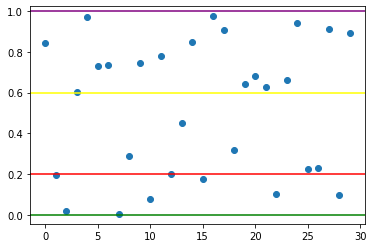

In [37]:
ex2_series = pd.Series(ex2)

q0 = 0.0
ql = 0.2
qh = 0.6 
q1 = 1.0

print(ex2_series.quantile(ql))
print(ex2_series.quantile(qh))

ax = plt.subplot()
ax.plot(ex1, 'o')
ax.axhline(ql, color = 'red')
ax.axhline(qh, color = 'yellow')
ax.axhline(q0, color = 'green')
ax.axhline(q1, color = 'purple')

In [38]:
cnt = 0
for i in range(len(ex2)):
    if ex2_series.quantile(ql) <= ex2_series[i] <= ex2_series.quantile(qh):
        cnt += 1

cnt

12

In [39]:
bin_cat = pd.qcut(ex2, [ql, qh], labels = False)
bin_cat_0 = bin_cat == 0 

np.sum(bin_cat_0)

12

In [40]:
idx = (bin_cat_0 & _roll(bin_cat_0, 1))[1:]
idx_inside_corridor = np.where(idx ==1)

idx_inside_corridor


(array([ 2,  3, 15, 25]),)

In [41]:
div = np.diff(ex2)

div[idx_inside_corridor]

array([-0.4227625 ,  0.22543015, -0.00804828, -0.27326914])

In [42]:
# [0.2 - 0.4] 분위에서 연속적으로 나타는 값의 차분의 평균을 구함 

np.mean(div[idx_inside_corridor])

-0.11966244474663221

## tsfresh

In [43]:
ex2_c = ex2.copy()
ex2_c = pd.DataFrame(ex2_c)
ex2_c['id'] = 0

In [44]:
settings = {'change_quantiles': [{'ql': 0.2, 'qh': 0.6, 'isabs': False, 'f_agg': 'mean'} ]}

In [45]:
change_quantiles = extract_features(ex2_c, column_id ='id', default_fc_parameters=settings)

Feature Extraction: 100%|██████████| 1/1 [00:00<00:00, 644.78it/s]


In [46]:
change_quantiles

,"0__change_quantiles__f_agg_""mean""__isabs_False__qh_0.6__ql_0.2"
0,-0.119662


### Reference

* pandas <br>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html

* tsfresh
https://tsfresh.readthedocs.io/en/latest/_modules/tsfresh/feature_extraction/feature_calculators.html#change_quantiles<br>
https://tsfresh.readthedocs.io/en/latest/api/tsfresh.feature_extraction.html

* blog<br>
https://kongdols-room.tistory.com/175